                               
 #         **The SPARK Foundation Internship**


#TASK1: **Prediction using Supervised Machine Learning**


#Author::  **Nourhan Sharaf**

 # #GRIPMARCH22







##Importing the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing data from url
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
# the top five records
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#discover the data statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization
**Let's plot the data to discover the relationship between the corresponding studied hours and the score achieved.**

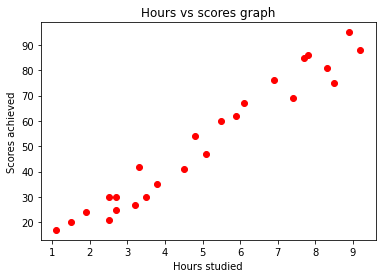

In [7]:
import matplotlib.pyplot as plt

# data.plot.scatter(x="Hours",y="Scores")    #plot by pandas dataframe
plt.scatter(data["Hours"],data["Scores"], color='red')
plt.title("Hours vs scores graph")
plt.xlabel("Hours studied")
plt.ylabel("Scores achieved")
plt.show()

**Since there is *(poistive linear) relationship between the Hours studied (independent feature) and the Scores achieved that depend on it, then this is a regression problem.**

##Data Preparation

In [19]:
#separate the predictor(Hours) from the target(Scores)
x=data["Hours"].values
y=data["Scores"].values

#x=data.iloc[:,:1].values   #by this way I will not need to reshape the datatset after that to enter to be trained on!!

In [17]:
#split the data with ratio of 4:1 to train and test sets respectively
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [18]:
print("size of training data is %d records and testing data is %d records" %( X_train.size,X_test.size))

size of training data is 20 records and testing data is 5 records


In [20]:
#reshape the predictor since we have only one feature
reshaped_X_train=np.reshape(X_train,(-1,1))   
reshaped_X_test=np.reshape(X_test,(-1,1))

##Model Training
**Simple Linear Regression**
**Estimated Regression Function: 𝑓(𝑥)=𝑏₀+ 𝑏₁𝑥**

**Our goal is to calculate the optimal values of the predicted weights 𝑏₀ (intercept) and 𝑏₁(slope of estimated regression line) that minimize SSR and determine the estimated regression function.**



In [34]:
#Using the Linear Regression from the SkLearn Library

from sklearn.linear_model import LinearRegression
reg = LinearRegression()        
#Train the Model
reg.fit(reshaped_X_train, y_train)

LinearRegression()

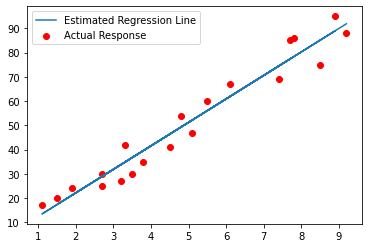

In [42]:
# Plotting the estimated regression line
#Equation od a straight line:    𝑓(𝑥)=𝑏₀+ 𝑏₁𝑥
line = reg.intercept_ + reg.coef_*X_train

#Plotting the Actual Response
plt.scatter(X_train, y_train,color='red')

plt.plot(X_train, line);
plt.legend(["Estimated Regression Line", "Actual Response"], loc ="upper left")
plt.show()

**As shown from the above graph, there is no overfitting or underfitting**

##Model Evaluation

In [43]:
#predict on test(unseen data)
predictions=reg.predict(reshaped_X_test)

In [44]:
#compare real values tp predicted values on the test data
df=pd.DataFrame({"Actual": y_test, "Predicted":predictions})  #by dictionary #key_value pair
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [50]:
#Evaluation
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error=",mean_absolute_error(y_test, predictions))

mean_absolute_error= 3.9207511902099244


##Inference

In [58]:
#Inference
studied_hours=9.25
predict=reg.predict(np.reshape(studied_hours, (1, -1)))   # reshape since it contains only a single value
print("Predicted Score= {}".format( predict[0]))

Predicted Score= 92.38611528261494


##References



*  [link text](https://realpython.com/linear-regression-in-python/)
*   [link text](https://www.geeksforgeeks.org/linear-regression-python-implementation/#:~:text=This%20article%20discusses%20the%20basics,given%20set%20of%20independent%20variables.)

